In [1]:
import pandas as pd
from scipy import stats
whr = pd.read_csv('../data/world-happiness-report.csv')
whr_2021 = pd.read_csv('../data/world-happiness-report-2021.csv')

In [2]:
# Remove redundant columns
whr_2021_drop = ['upperwhisker', 'lowerwhisker', 'Ladder score in Dystopia', 'Dystopia + residual']
for col in whr_2021.columns:
    if 'Explained by' in col:
        whr_2021_drop.append(col)
whr_2021.drop(columns=whr_2021_drop, inplace=True)

In [3]:
# Rename columns
whr_2021.rename(
    columns = {
        'Country name': 'Country',
        'Regional indicator': 'Region',
        'Ladder score': 'Happiness Score',
        'Standard error of ladder score': 'Happiness Score Std Error',
        'Logged GDP per capita': 'GDP Per Capita',
        'Social support': 'Social Support',
        'Healthy life expectancy': 'Life Expectancy',
        'Freedom to make life choices': 'Freedom Of Choice',
        'Perceptions of corruption': 'Perceived Corruption'
    },
    inplace = True
)

In [4]:
# Calculate correlations between each metric and ladder score
cors = []
for col in whr_2021.columns:
    excluded_cols = ['Happiness Score', 'Happiness Score Std Error']
    if (isinstance(whr_2021[col][0], float)) & (col not in excluded_cols):
        cors.append({
            'Factor': col,
            'Correlation': stats.pearsonr(whr_2021['Happiness Score'], whr_2021[col])[0]
        })

In [12]:
# Correlation Dataframe
factor_cors = pd.DataFrame(cors)
factor_cors.sort_values(by='Correlation', ascending=False, inplace=True)
factor_cors.to_csv('../data/Correlations.csv',index=False)

<AxesSubplot:title={'center':'Correlation Between Factors and Happiness Score'}, xlabel='Factor', ylabel='Correlation'>

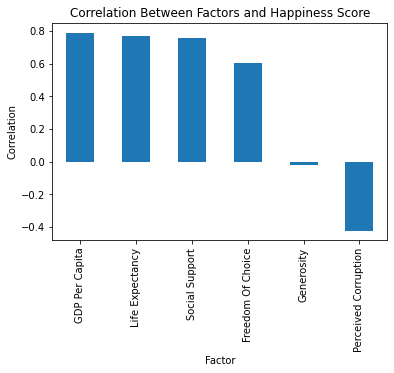

In [6]:
factor_cors.plot.bar(
    x='Factor',
    y='Correlation',
    title='Correlation Between Factors and Happiness Score',
    legend=False,
    xlabel='Factor',
    ylabel='Correlation',
    sort_columns=True
)